In [1]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image

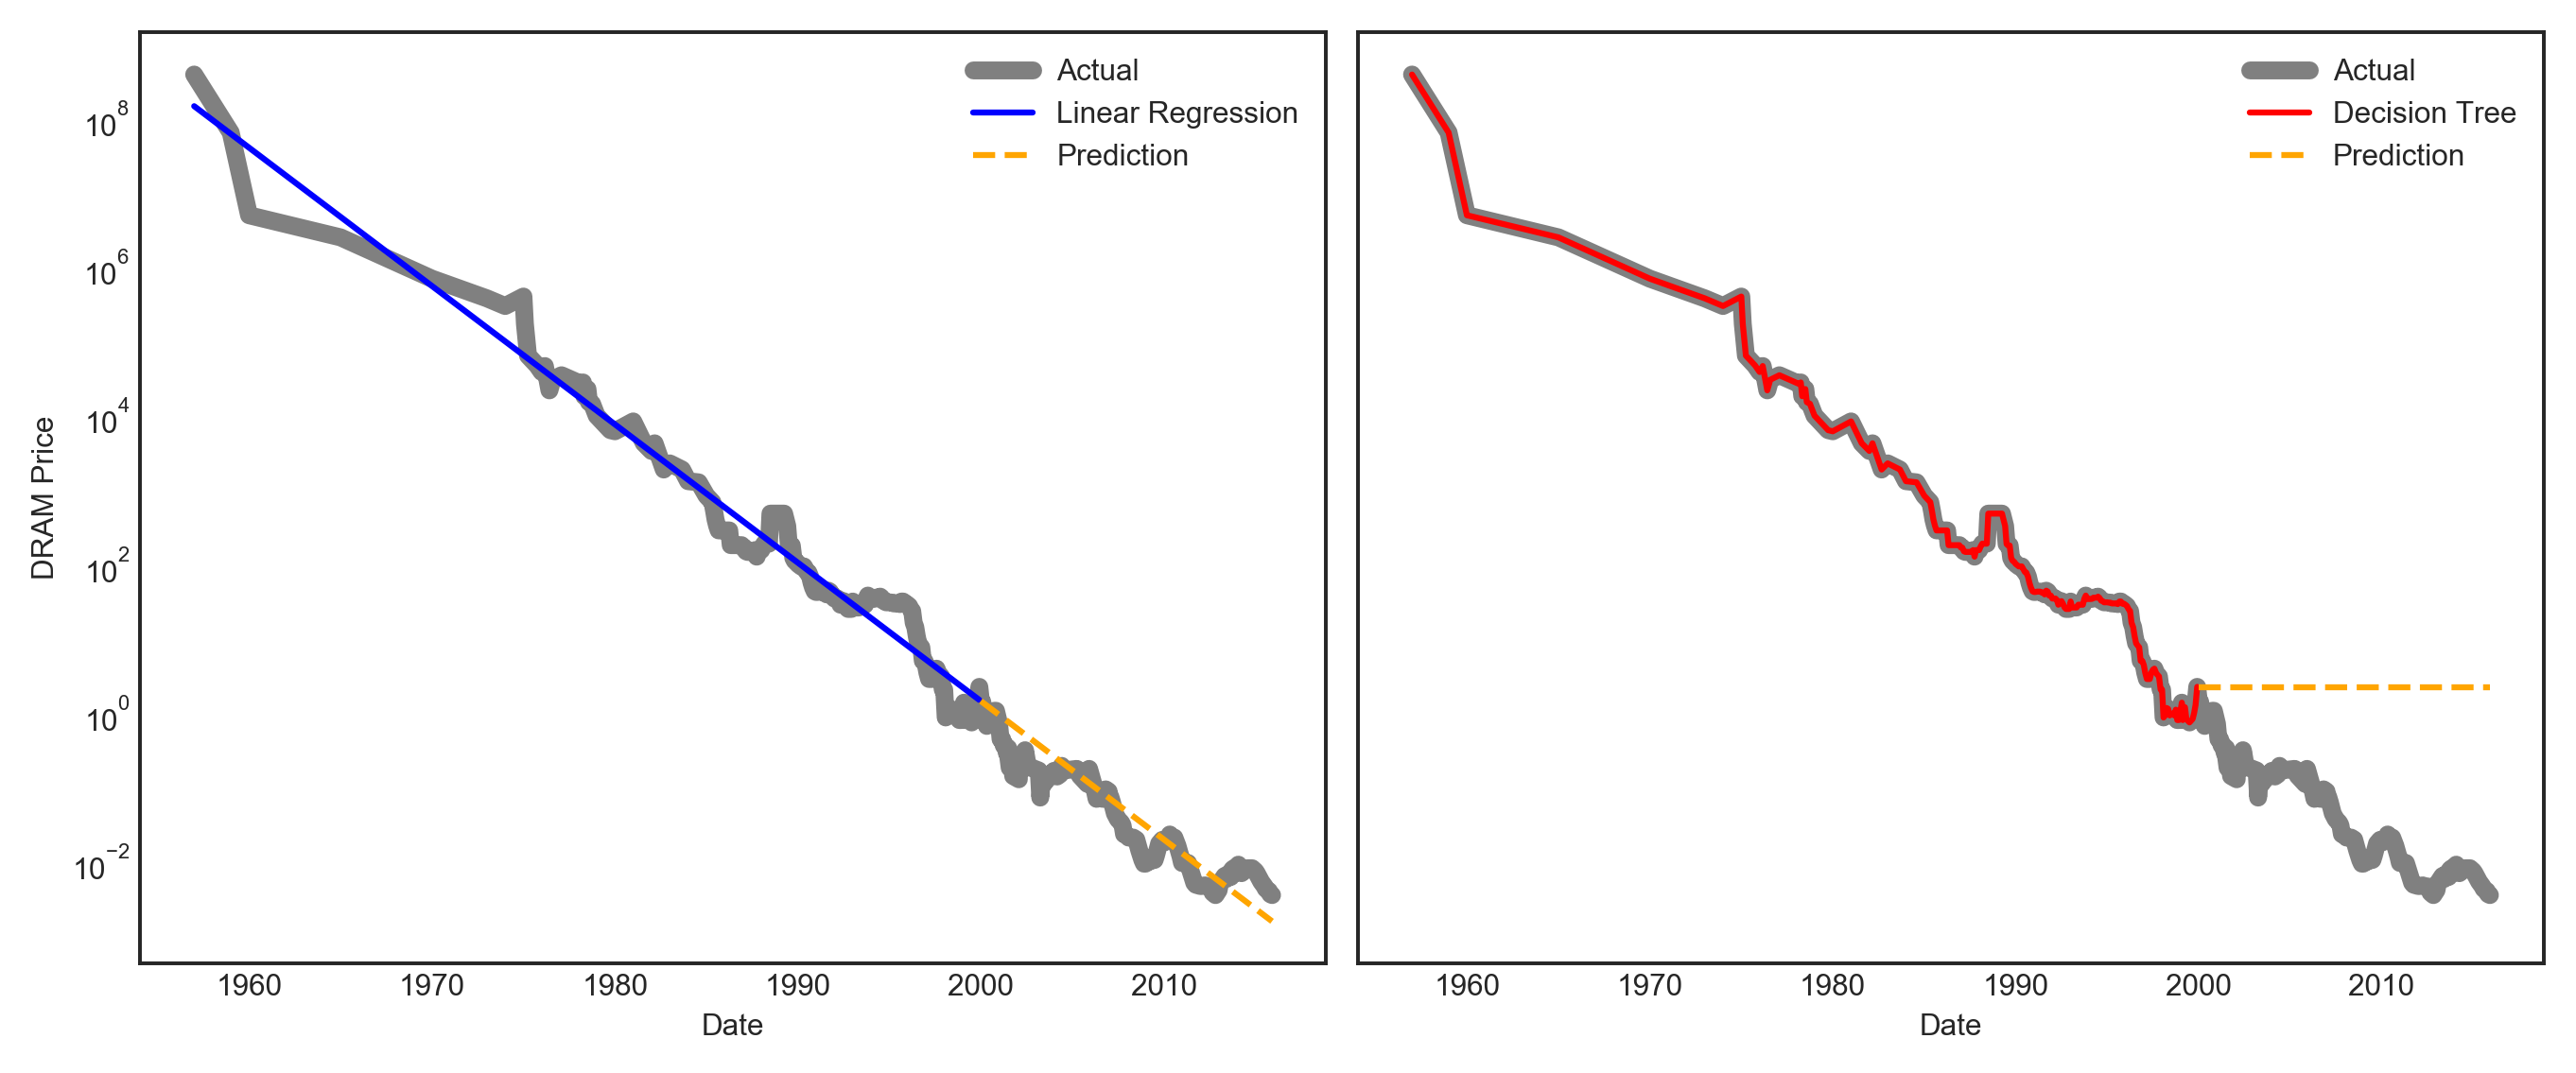

In [2]:
Image(filename = './charts/LPDRAM prices.png', width=800)

In [3]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(f"R^2 score = {r2_score(y_test, y_pred):.3f}")

R^2 score = 0.656


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X, y = load_boston(return_X_y=True)

estimator = Pipeline([
    ('tree', DecisionTreeRegressor()),
])

param_grid = {
    'tree__max_depth': [5, 10, 20, 50],
    'tree__min_samples_split': [20, 50, 100, 200],
}

grid = GridSearchCV(estimator, param_grid, 
                    scoring='r2',
                    n_jobs=-1,
                    cv=5,
                    iid=False)

grid.fit(X, y)

print(f"Best score: {grid.best_score_:.3f}")
print(f"Best parameters: {grid.best_params_}")
print(f"Avg. time to fit: {grid.cv_results_['mean_fit_time'].mean():.3f}")
print(f"Avg. time to predict: {grid.cv_results_['mean_score_time'].mean():.3f}")

Best score: 0.243
Best parameters: {'tree__max_depth': 50, 'tree__min_samples_split': 100}
Avg. time to fit: 0.001
Avg. time to predict: 0.000


In [5]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

df['CRIM'] = np.log(df['CRIM'])
df['LSTAT'] = np.log(df['LSTAT'])

X = df.values
y = boston.target

estimator = Pipeline([
    ('tree', DecisionTreeRegressor()),
])

param_grid = {
    'tree__max_depth': [5, 10, 20, 50],
    'tree__min_samples_split': [20, 50, 100, 200],
}

grid = GridSearchCV(estimator, param_grid, 
                    scoring='r2',
                    n_jobs=-1,
                    cv=5,
                    iid=False)

grid.fit(X, y)

print(f"Best score: {grid.best_score_:.3f}")
print(f"Best parameters: {grid.best_params_}")
print(f"Avg. time to fit: {grid.cv_results_['mean_fit_time'].mean():.3f}")
print(f"Avg. time to predict: {grid.cv_results_['mean_score_time'].mean():.3f}")

Best score: 0.242
Best parameters: {'tree__max_depth': 10, 'tree__min_samples_split': 100}
Avg. time to fit: 0.001
Avg. time to predict: 0.000


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

estimator = Pipeline([
    ('sc', StandardScaler()),
    ('pca', PCA()),
    ('tree', DecisionTreeRegressor()),
])

param_grid = {
    'pca__n_components': [5, 6, 7],
    'tree__max_depth': [5, 10, 20, 50],
    'tree__min_samples_split': [20, 50, 100, 200],
}

grid = GridSearchCV(estimator, param_grid, 
                    scoring='r2',
                    n_jobs=-1,
                    cv=5,
                    iid=False)

grid.fit(X, y)

print(f"Best score: {grid.best_score_:.3f}")
print(f"Best parameters: {grid.best_params_}")
print(f"Avg. time to fit: {grid.cv_results_['mean_fit_time'].mean():.3f}")
print(f"Avg. time to predict: {grid.cv_results_['mean_score_time'].mean():.3f}")

Best score: -0.819
Best parameters: {'pca__n_components': 5, 'tree__max_depth': 5, 'tree__min_samples_split': 200}
Avg. time to fit: 0.002
Avg. time to predict: 0.000
